# Numerical check

We check the correctness of the expressions using Monte Carlo simulations.

## Python packages

In [1]:
import numpy as np
import random as rng ## for random number generation
import math as mt
import pandas as pd
import matplotlib
# https://matplotlib.org/stable/gallery/index.html
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

## Analytical Results

In [2]:
def mean_ROC(M,m):    
    return ((M+1)*(1-m**M))/(2*(1-m))
def mean_ROCI(M,m,I):
    return ((M+1)*(1-m**I))/(2*(1-m))
def variance_ROC(M,m):
    return (((M*(M+1))/12)*(((1-m**(2*M))/(1-m**2))-(1/M)*(((1-m**M)/(1-m))**2)))
def variance_ROCI(M,m,I):
    return (((M*(M+1))/12)*(((1-m**(2*I))/(1-m**2))-(1/M)*(((1-m**I)/(1-m))**2)))
def best_order_ROC(M,m):
    weights = np.flip(np.arange(1,M+1))
    moduls = m**np.arange(0,M)
    return sum(weights*moduls)
def best_order_ROCI(M,m,I):
    weights =np.flip(np.arange(1,M+1))
    moduls = m**np.arange(0,M)
    moduls[I:M]=0
    return sum(weights*moduls)
def discri_ROC(M,m):   
    return (best_order_ROC(M,m)-mean_ROC(M,m))/mt.sqrt(variance_ROC(M,m))
def discri_ROCI(M,m,I):   
    return (best_order_ROCI(M,m,I)-mean_ROCI(M,m,I))/mt.sqrt(variance_ROCI(M,m,I))
def cardi_ROC(M):
    return mt.factorial(M)


def mean_RankedNoM(M,N,W):
    return (N*(N+1)*W*(W+1))/(4*M)
def mean_RankedNoMI(M,N,W,I):
    if (I>N):
        I=N    
    return (I*W*(W+1)*(2*N-I+1)/(4*M))
def variance_RankedNoM(M,N,W):
    ExpW = 1/M*W*(W+1)/2
    VarV = (ExpW*(2*W+1))/3-ExpW**2
    Cov=ExpW/(M-1)*(ExpW-((2*W+1)/3))
    VarS = (N*(N+1))/2*(VarV*((2*N+1)/3)+Cov*((N*(N+1))/2-(2*N+1)/3))
    return VarS
def variance_RankedNoMI(M,N,W,I):
    if (I>N):
        I=N
    ExpW = 1/M*W*(W+1)/2
    VarV = (ExpW*(2*W+1))/3-ExpW**2
    Cov=ExpW/(M-1)*(ExpW-((2*W+1)/3))
    hp = I*(I-1)/2
    hq = (2*I-1)/3
    VarS = (N*(N*I-2*hp)+hp*hq)*VarV + hp*(2*N*(N-I+1)+hp-hq)*Cov
    return VarS
def best_order_RankedNoM(M,N,W):
    x = np.zeros(M)
    y= np.zeros(M)
    for i in range(N):
        x[i]=N-i
    for j in range(W):
        y[j]=W-j   
    return sum(x*y)
def best_order_RankedNoMI(M,N,W,I):
    x = np.zeros(M)
    y= np.zeros(M)
    for i in range(I):
        x[i]=N-i
    for j in range(W):
        y[j]=W-j   
    return sum(x*y)
def discri_RankedNoM(M,N,W):
    return (best_order_RankedNoM(M,N,W)-mean_RankedNoM(M,N,W))/mt.sqrt(variance_RankedNoM(M,N,W))
def discri_RankedNoMI(M,N,W,I):
    return (best_order_RankedNoMI(M,N,W,I)-mean_RankedNoMI(M,N,W,I))/mt.sqrt(variance_RankedNoMI(M,N,W,I))
def cardi_RankedNoM(M,N,W):
    return mt.factorial(M)/mt.factorial(M-W)



def mean_NoM(M,N,W):
    return (W*N/M)
def mean_NoMI(M,N,W,I):
    if (I>N):
        I=N
    return (W*I/M) 
def variance_NoM(M,N,W):
    return (W*N/M) * (M-W)*(M-N) / ((M-1)*M)  
def variance_NoMI(M,N,W,I):
    if (I>N):
        I=N
    return (W*I/M) * (M-W)*(M-I) / ((M-1)*M)  
def best_order_NoM(M,N,W):
    x = np.zeros(M)
    y = np.zeros(M)
    for i in range(N):
        x[i]=1
    for j in range(W):
        y[j]=1    
    return sum(x*y)
def best_order_NoMI(M,N,W,I):
    if (I>N):
        I=N
    x = np.zeros(M)
    y = np.zeros(M)
    for i in range(I):
        x[i]=1
    for j in range(W):
        y[j]=1    
    return sum(x*y)
def discri_NoM(M,N,W):
    return (best_order_NoM(M,N,W)-mean_NoM(M,N,W))/mt.sqrt(variance_NoM(M,N,W))
def discri_NoMI(M,N,W,I):
    return (best_order_NoMI(M,N,W,I)-mean_NoMI(M,N,W,I))/mt.sqrt(variance_NoMI(M,N,W,I))
def cardi_NoM(M,N,W):
    return mt.factorial(M)/(mt.factorial(M-W)*mt.factorial(W))
   


## Max value formula, integration of each scheme

In [3]:
M=31
m=0.8
W=10 # W should be greater than N for NofM and RankedNoM
N=5
xR=best_order_ROC(M,m)
maxR = ((1-m)*(1+M)-(1-m**(M+1)))/(1-m)**2
print(xR,maxR)
xF=best_order_NoM(M,N,W)
maxF=N
print(xF,maxF)
xH=best_order_RankedNoM(M,N,W)
maxH=N*W*(N+1)/2+(N*(1-N**2)/6)
print(xH,maxH)

135.0198070406286 135.0198070406286
5.0 5
130.0 130.0


## Asymptotic value for ROC

In [4]:
def max(M,m):
    return ((1-m)*(1+M)-(1-m**(M+1)))/(1-m)**2

asympt=(mt.sqrt(3)/(1-m))*mt.sqrt(1-m*m)

print("M\tFinal Discriminability")
for M in (32,120,1200,12000, 120000):
    D = (max(M,m)-mean_ROC(M,m))/ mt.sqrt(variance_ROC(M,m))
    print(M,"\t",D)
print("Inf \t",asympt)

M	Final Discriminability
32 	 4.342775778272229
120 	 4.976805706620272
1200 	 5.174474595925669
12000 	 5.193987088436375
120000 	 5.195935913649229
Inf 	 5.196152422706631



## Numerical checks

In [5]:
## Monte Carlo Estimation
def simulate(M,moduls,weights,I,nsims):
    simsN = mt.floor(nsims)
    sims = np.zeros(simsN)
    sims[0] = sum(weights[0:I]*moduls[0:I]) ## force the maximal values to belong to the sample
    for i in range(1,simsN):
        sims[i]= sum(weights[np.random.permutation(M)][0:I]*moduls[0:I]) ## rand orders
    return( sims ) 

In [6]:
def NumericalCheck(M,N,W,I,nsims):
    print("M=",M," ; N=",N," ; W=",W," ; n=",nsims,"\n")
    ## RankedNoM
    print("RankedNoM\n=======")
    Ms = np.zeros(M) ; Ms[0:N]=(np.arange(N)+1)[::-1]
    Ws = np.zeros(M) ; Ws[0:W]=(np.arange(W)+1)[::-1]
    # print(Ms)
    sims = simulate(M,Ms,Ws,M,nsims)
    print("\t\tTheoretical values \t / Monte Carlo estimate")
    print("Mean\t\t",mean_RankedNoM(M,N,W), "\t / ",sims.mean()," ± ",mt.sqrt(sims.var()/nsims))
    print("Var \t\t",variance_RankedNoM(M,N,W), "\t / ",sims.var())
    print("Best\t\t",best_order_RankedNoM(M,N,W), "\t\t\t / ",sims.max())
    print("Disc\t\t",discri_RankedNoM(M,N,W), "\t / ",(sims.max()-sims.mean())/mt.sqrt(sims.var()))

    print("\n I=",I)
    sims = simulate(M,Ms,Ws,I,nsims)
    print("Mean\t\t", mean_RankedNoMI(M,N,W,I), "\t / ",sims.mean()," ± ",mt.sqrt(sims.var()/nsims))
    print("Var\t\t",variance_RankedNoMI(M,N,W,I), "\t / ",sims.var())
    print("Best\t\t",best_order_RankedNoMI(M,N,W,I), "\t\t\t / ",sims.max())
    print("Disc\t\t",discri_RankedNoMI(M,N,W,I), "\t / ",(sims.max()-sims.mean())/mt.sqrt(sims.var()))

    ## NoM
    print("\n\nNoM\n=======")
    Ms = np.zeros(M) ; Ms[0:N]=1
    Ws = np.zeros(M) ; Ws[0:W]=1
    # print(Ms)
    sims = simulate(M,Ms,Ws,M,nsims)
    print("\t\tTheoretical values \t / Monte Carlo estimate")
    print("Mean\t\t",mean_NoM(M,N,W), "\t / ",sims.mean()," ± ",mt.sqrt(sims.var()/nsims))
    print("Var \t\t",variance_NoM(M,N,W), "\t / ",sims.var())
    print("Best\t\t",best_order_NoM(M,N,W), "\t\t\t / ",sims.max())
    print("Disc\t\t",discri_NoM(M,N,W), "\t / ",(sims.max()-sims.mean())/mt.sqrt(sims.var()))

    print("\n I=",I)
    sims = simulate(M,Ms,Ws,I,nsims)
    print("Mean\t\t", mean_NoMI(M,N,W,I), "\t / ",sims.mean()," ± ",mt.sqrt(sims.var()/nsims)) 
    print("Var\t\t",variance_NoMI(M,N,W,I), "\t / ",sims.var())
    print("Best\t\t",best_order_NoMI(M,N,W,I), "\t\t\t / ",sims.max())
    print("Disc\t\t",discri_NoMI(M,N,W,I), "\t / ",(sims.max()-sims.mean())/mt.sqrt(sims.var()))



    ## ROC
    print("\n\nGeometrical ROC\n=======")
    m=0.8
    Ms = m**np.arange(0,M)
    Ws = np.flip(np.arange(1,M+1))
    # print(Ms) ; print(Ws)
    sims = simulate(M,Ms,Ws,M,nsims)
    print("\t\tTheoretical values \t / Monte Carlo estimate")
    print("Mean\t\t",mean_ROC(M,m), "\t / ",sims.mean()," ± ",mt.sqrt(sims.var()/nsims))
    print("Var \t\t",variance_ROC(M,m), "\t / ",sims.var())
    print("Best\t\t",best_order_ROC(M,m), "\t / ",sims.max())
    print("Disc\t\t",discri_ROC(M,m), "\t / ",(sims.max()-sims.mean())/mt.sqrt(sims.var()))

    print("\n I=",I)
    sims = simulate(M,Ms,Ws,I,nsims)
    print("Mean\t\t", mean_ROCI(M,m,I), "\t / ",sims.mean()," ± ",mt.sqrt(sims.var()/nsims))
    print("Var\t\t",variance_ROCI(M,m,I), "\t / ",sims.var())
    print("Best\t\t",best_order_ROCI(M,m,I), "\t / ",sims.max())
    print("Disc\t\t",discri_ROCI(M,m,I), "\t / ",(sims.max()-sims.mean())/mt.sqrt(sims.var()))


In [7]:
NumericalCheck(31,15,15,7,1e+6)

M= 31  ; N= 15  ; W= 15  ; n= 1000000.0 

RankedNoM
		Theoretical values 	 / Monte Carlo estimate
Mean		 464.51612903225805 	 /  464.344048  ±  0.14156980487015475
Var 		 20045.841137703785 	 /  20042.00965097369
Best		 1240.0 			 /  1240.0
Disc		 5.47722557505166 	 /  5.478964618983671

 I= 7
Mean		 325.16129032258067 	 /  325.261268  ±  0.14462982528867338
Var		 20896.371834894206 	 /  20917.786363032184
Best		 1036.0 			 /  1036.0
Disc		 4.917401009719969 	 /  4.914192011097321


NoM
		Theoretical values 	 / Monte Carlo estimate
Mean		 7.258064516129032 	 /  7.256851  ±  0.0014122671715362503
Var 		 1.9979188345473464 	 /  1.9944985637990003
Best		 15.0 			 /  15.0
Disc		 5.477225575051661 	 /  5.482779148351285

 I= 7
Mean		 3.3870967741935485 	 /  3.387841  ±  0.00118319582433298
Var		 1.3985431841831426 	 /  1.3999523587190001
Best		 7.0 			 /  7.0
Disc		 3.055050463303893 	 /  3.052883492076499


Geometrical ROC
		Theoretical values 	 / Monte Carlo estimate
Mean		 79.92077183748

In [8]:
NumericalCheck(31,25,15,30,1e+6)

M= 31  ; N= 25  ; W= 15  ; n= 1000000.0 

RankedNoM
		Theoretical values 	 / Monte Carlo estimate
Mean		 1258.0645161290322 	 /  1258.276009  ±  0.23390459925369556
Var 		 54742.49046132499 	 /  54711.361552031914
Best		 2440.0 			 /  2440.0
Disc		 5.05162955517556 	 /  5.052162269448533

 I= 30
Mean		 1258.0645161290322 	 /  1257.685693  ±  0.23359725879836385
Var		 54742.49046132498 	 /  54567.679318109775
Best		 2440.0 			 /  2440.0
Disc		 5.05162955517556 	 /  5.061336391881843


NoM
		Theoretical values 	 / Monte Carlo estimate
Mean		 12.096774193548388 	 /  12.097013  ±  0.0011167710050995234
Var 		 1.2486992715920917 	 /  1.2471774778309996
Best		 15.0 			 /  15.0
Disc		 2.5980762113533147 	 /  2.599446965173754

 I= 30
Mean		 12.096774193548388 	 /  12.098347  ±  0.0011163739819572112
Var		 1.2486992715920917 	 /  1.2462908675909998
Best		 15.0 			 /  15.0
Disc		 2.5980762113533147 	 /  2.599176482877953


Geometrical ROC
		Theoretical values 	 / Monte Carlo estimate
Mean		 79.

In [9]:
NumericalCheck(31,25,15,15,1e+6)

M= 31  ; N= 25  ; W= 15  ; n= 1000000.0 

RankedNoM
		Theoretical values 	 / Monte Carlo estimate
Mean		 1258.0645161290322 	 /  1257.806047  ±  0.23403479335182997
Var 		 54742.49046132499 	 /  54772.28449923376
Best		 2440.0 			 /  2440.0
Disc		 5.05162955517556 	 /  5.051359825898964

 I= 15
Mean		 1045.1612903225807 	 /  1045.272044  ±  0.26866576218800575
Var		 72078.30731876516 	 /  72181.29177206206
Best		 2440.0 			 /  2440.0
Disc		 5.1954324414754804 	 /  5.191312598380151


NoM
		Theoretical values 	 / Monte Carlo estimate
Mean		 12.096774193548388 	 /  12.099141  ±  0.0011173683645597813
Var 		 1.2486992715920917 	 /  1.2485120621190002
Best		 15.0 			 /  15.0
Disc		 2.5980762113533147 	 /  2.596152792586781

 I= 15
Mean		 7.258064516129032 	 /  7.259846  ±  0.0014134440407331307
Var		 1.9979188345473464 	 /  1.997824056284
Best		 15.0 			 /  15.0
Disc		 5.477225575051661 	 /  5.4760951101999815


Geometrical ROC
		Theoretical values 	 / Monte Carlo estimate
Mean		 79.920771

## Graphics

### Discriminability along integration

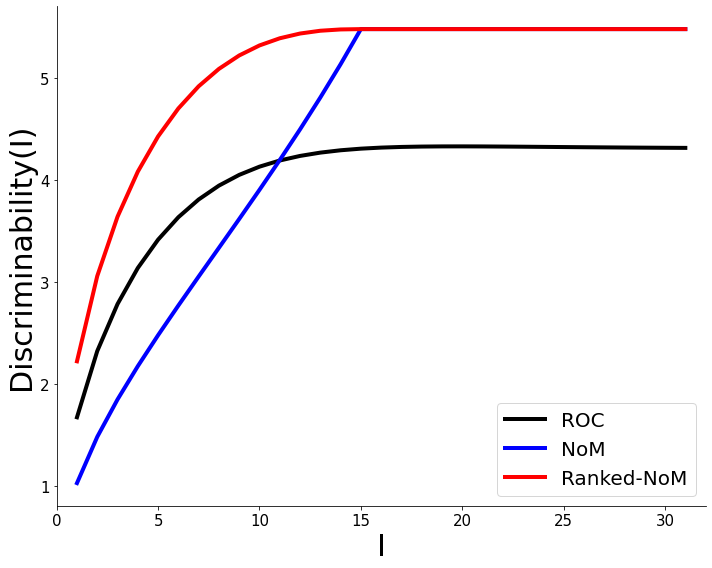

In [10]:
M=31 ; N=15 ; W=15 ; m=0.8

abcissas = np.arange(1,M+1)
dROC = [discri_ROCI(M,m,i) for i in abcissas]
dNoM = [discri_NoMI(M,N,W,i) for i in abcissas]
dHyb = [discri_RankedNoMI(M,N,W,i) for i in abcissas]


#fig = plt.figure(figsize=(10, 8))
fig, axes = plt.subplots(figsize=(10,8))

#axes = fig.add_axes((0,0,1.0,1.0))

axes.plot(abcissas,dROC,linewidth=4,color="black",label="ROC")
axes.plot(abcissas,dNoM,linewidth=4,color="blue",label="NoM")
axes.plot(abcissas,dHyb,linewidth=4,color="red",label="Ranked-NoM")

axes.set_xlabel("I", fontsize=30)
axes.set_ylabel("Discriminability(I)", fontsize=30)
axes.tick_params(axis="x", labelsize=15)
axes.tick_params(axis="y", labelsize=15)
axes.set_xlim(abcissas[0]-1,abcissas[-1]+1)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

axes.legend(prop={'size': 20})

fig.tight_layout()

fig.savefig("Discri-31-15-15.pdf")


### Discriminability as a function of $M$

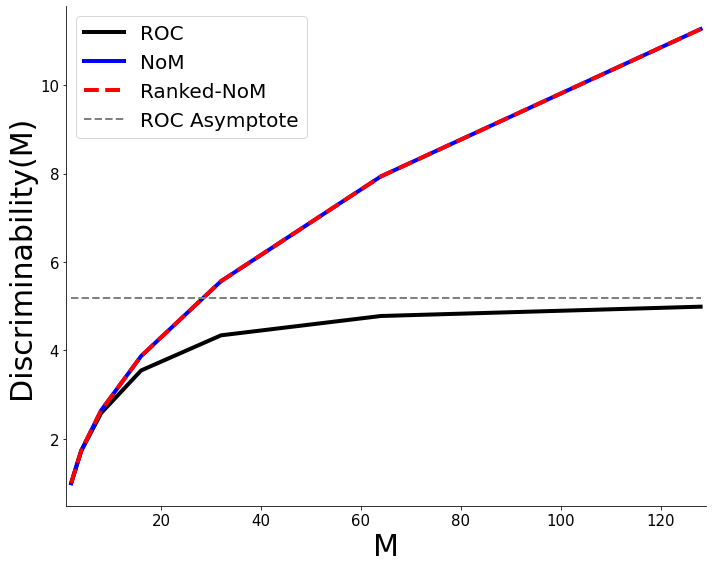

In [11]:
m=0.8
abcissas = 2**np.arange(1,8)
dROC = [discri_ROC(i,m) for i in abcissas]


AsympTdROC = [(3*(1-m**2))**(1/2)/(1-m) for i in abcissas]
dNoM = [discri_NoM(i,mt.floor(i/2),mt.floor(i/2)) for i in abcissas]
dNoM2= [(i-1)**(1/2) for i in abcissas]
dHyb = [discri_RankedNoM(i,mt.floor(i/2),mt.floor(i/2)) for i in abcissas]

#fig = plt.figure(figsize=(10, 8))
fig, axes = plt.subplots(figsize=(10,8))

#axes = fig.add_axes((0,0,1.0,1.0))

axes.plot(abcissas,dROC,linewidth=4,color="black",label="ROC")
axes.plot(abcissas,dNoM,linewidth=4,color="blue",label="NoM")
axes.plot(abcissas,dHyb,'--',linewidth=4,color="red",label="Ranked-NoM")
#axes.plot(abcissas,dNoM2,linewidth=1,color="red",label="RadicalFunctionNoM-RankedNoM")
axes.plot(abcissas,AsympTdROC,'--',linewidth=2,color="gray",label="ROC Asymptote")

axes.set_xlabel("M", fontsize=30)
axes.set_ylabel("Discriminability(M)", fontsize=30)
axes.tick_params(axis="x", labelsize=15)
axes.tick_params(axis="y", labelsize=15)
axes.set_xlim(abcissas[0]-1,abcissas[-1]+1)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

axes.legend(prop={'size': 20})

fig.tight_layout()

fig.savefig("Discri-M-Asymptote.pdf")
